# Intro to text mining - Part 2 - Exercises with Answers

## Exercise 1

#### Task 1
##### Import the required packages.
##### Set the `data_dir` variable corresponding to your `data` folder
##### Print the `data_dir`

#### Result:

In [24]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Packages with tools for text processing.
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

# We will introduce these packages today.
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Packages for getting data ready for and building a LDA model
import gensim
from gensim import corpora, models
from pprint import pprint

In [8]:
home_dir = Path(".").resolve()
main_dir = home_dir.parent
main_dir = home_dir
data_dir = str(main_dir) + "/data"

In [9]:
print(data_dir)

C:\Users\aashe\Desktop\skillsoft-text-mining-aug-2021/data


#### Task 2
##### Load the pickle files which we pickled last time

#### Result:

In [14]:
titles_tokenized = pickle.load(open(str(data_dir) + "/titles_tokenized.sav","rb"))  
word_counts_array = pickle.load(open(str(data_dir) + "/ex_word_counts_array.sav","rb"))  
processed_docs_ex = pickle.load(open(str(data_dir) + "/titles_clean.sav","rb"))  
titles_clean_list = pickle.load(open(str(data_dir) + "/titles_clean_list.sav","rb"))

#### Task 3
##### Create a `CountVectorizer()` and save it as `ex_vec`.
##### Create a DTM of the `titles_clean_list` and name it `ex_X`.
##### Convert `ex_X` to an array.
##### Print the  first 20 feature names of `ex_vec`.
##### Convert `ex_X` to a pandas dataframe `ex_DTM` and print the top 5 lines.

#### Result:

In [15]:
ex_vec = CountVectorizer()
ex_X = ex_vec.fit_transform(titles_clean_list)
print(ex_X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
print(ex_vec.get_feature_names()[:20])

['aagreement', 'ababa', 'abolit', 'accommod', 'accord', 'account', 'accru', 'acquir', 'acquisit', 'across', 'act', 'activ', 'addi', 'addit', 'adjoin', 'administr', 'admiss', 'advanc', 'advisori', 'affect']


In [17]:
# Convert the matrix into a pandas dataframe for easier manipulation.
ex_DTM = pd.DataFrame(ex_X.toarray(), columns = ex_vec.get_feature_names())
print(ex_DTM.head())

   aagreement  ababa  abolit  accommod  accord  account  accru  acquir  \
0           0      0       0         0       0        0      0       0   
1           0      0       0         0       0        0      0       0   
2           0      0       0         0       0        0      0       0   
3           0      0       0         0       0        0      0       0   
4           0      0       0         0       0        0      0       0   

   acquisit  across  ...  yarnal  year  york  yosemit  young  youth  yugoslav  \
0         0       0  ...       0     0     0        0      0      0         0   
1         0       0  ...       0     0     0        0      0      0         0   
2         0       0  ...       0     1     0        0      0      0         0   
3         0       0  ...       0     0     1        0      0      0         0   
4         0       0  ...       0     0     0        0      0      0         0   

   yugoslavia  zealand  zone  
0           0        0     0  
1     

#### Task 4
##### Use the convenience function that sorts and looks at first n-entries in the dictionary we defined in class.

#### Result:

In [18]:
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order.
    sorted_x = sorted(dict_x.items(),
    reverse = True,
    key = lambda kv: kv[1])
    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)
    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))

#### Task 5

#####  Sum the counts of each word in all documents and save the series as a dictionary `ex_corpus_freq_dist`.
##### Print the top 30 words and their counts in `ex_corpus_freq_dist`.

#### Result:

In [19]:
# Sum frequencies of each word in all documents.
ex_DTM.sum(axis = 0).head()

# Save series as a dictonary.
ex_corpus_freq_dist = ex_DTM.sum(axis = 0).to_dict()

# Glance at the top 30 words with highest counts.
print(HeadDict(ex_corpus_freq_dist, 30))

{'agreement': 1085, 'exchang': 386, 'constitut': 334, 'note': 324, 'amend': 256, 'unit': 203, 'concern': 175, 'annex': 167, 'govern': 161, 'loan': 143, 'state': 132, 'project': 119, 'develop': 118, 'relat': 113, 'convent': 104, 'america': 91, 'protocol': 88, 'agricultur': 85, 'assist': 85, 'republ': 80, 'applic': 72, 'sale': 70, 'commod': 69, 'credit': 69, 'extend': 69, 'letter': 65, 'gener': 63, 'air': 60, 'guarante': 60, 'condit': 59}


#### Task 6
##### Plot the frequency distribution of words in `ex_corpus_freq_dist` .

#### Result:

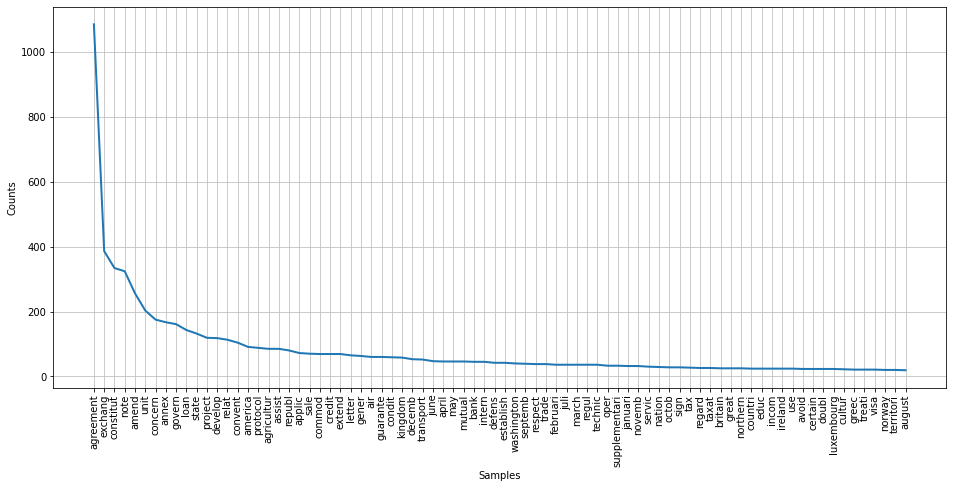

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# Save as a FreqDist object native to nltk.
ex_corpus_freq_dist = nltk.FreqDist(ex_corpus_freq_dist)

# Plot distribution for the entire corpus.
plt.figure(figsize = (16, 7))
ex_corpus_freq_dist.plot(80)

#### Task 7
##### Create the word cloud of the entire corpus and name it `ex_wordcloud`.
##### Plot the wordcloud and set `figsize` to` (14, 7)`.

#### Result:

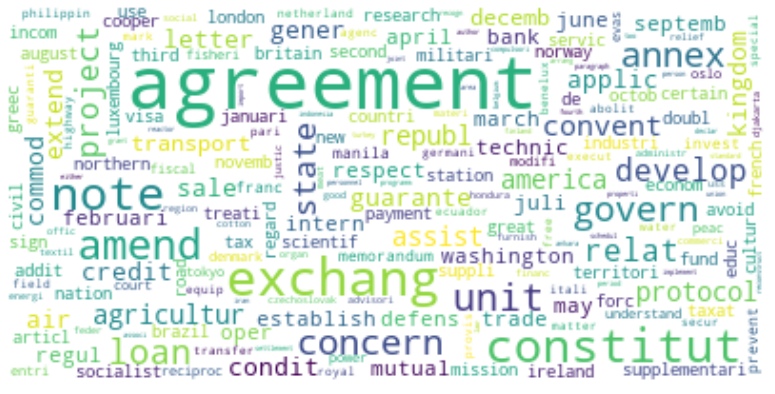

In [21]:
# Word cloud from corpus.
ex_wordcloud = WordCloud(collocations = False, max_font_size = 40, background_color = "white")
ex_wordcloud = ex_wordcloud.generate(' '.join(titles_clean_list))

# Plot the cloud using matplotlib.
plt.figure(figsize = (14, 7))
plt.imshow(ex_wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Exercise 2

#### Task 1
##### Create a dictionary from `processed_docs_ex` object, using gensim's function.
##### Label the dictionary `dictionary_ex`.
##### Then loop through the dictionary printing out the first 10 items, key and value.
##### Make sure to set the seed as `2` for exercises.
##### Use `.filter_extremes()` to filter items. Set `keep_n` as `942`.

##### Result:

In [22]:
len(processed_docs_ex)

942

In [25]:
# Set the seed. 
np.random.seed(2)

dictionary_ex = gensim.corpora.Dictionary(processed_docs_ex)

# The loop below iterates through the first 10 items of the dictionary and prints out the key and value. 
count = 0
for k, v in dictionary_ex.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

# Key stands for the order of the word within all the words in the corpus, words are in alphabetical order.
# Value stands for the actual word.

0 administr
1 agreement
2 arrang
3 concern
4 conclud
5 council
6 de
7 fifth
8 geneva
9 hold
10 leagu


In [26]:
len(dictionary_ex)

1117

In [27]:
dictionary_ex.filter_extremes(no_below = 5, no_above = 0.5, keep_n = 942)

#### Task 2
##### Write a list comprehension that transforms each doc within the `processed_docs_ex` .
##### Save this object, the output of the list comprehension, as `bow_corpus_ex`.
##### What type of object is this?

##### Result:

In [28]:
bow_corpus_ex = [dictionary_ex.doc2bow(doc) for doc in processed_docs_ex]
# What type of object is this?
type(bow_corpus_ex)

list

#### Task 3
##### Transform `bow_corpus_ex` to a TF-IDF transformed object using `TfIdfModel()`.
##### Preview the scores for the first document using `pprint`.

##### Result:

In [29]:
# This is the transformation.
tfidf = models.TfidfModel(bow_corpus_ex)

# Apply the transformation to the entire corpus.
corpus_tfidf_ex = tfidf[bow_corpus_ex]

# Preview TF-IDF scores for the first document.
for doc in corpus_tfidf_ex:
    pprint(doc)
    break

[(0, 0.3614216196834917),
 (1, 0.18071080984174584),
 (2, 0.06422333824840414),
 (3, 0.19852219734268742),
 (4, 0.15444311261576676),
 (5, 0.19852219734268742),
 (6, 0.7498978706337802),
 (7, 0.35249454270547026),
 (8, 0.20813303228399968)]


#### Task 4

##### Pickle the `ex_DTM` as `ex_DTM.sav`, `ex_X` as `ex_DTM_matrix.sav` 
##### `box_corpus_ex` as `box_corpus_ex.sav`, `corpus_tfidf_ex` as `corpus_tfidf_ex.sav` 
##### and `dictionary_ex` as `disctionary_ex.sav` for later use.

#### Result:

In [30]:
pickle.dump(ex_DTM, open(str(data_dir) + '/ex_DTM.sav', 'wb'))
pickle.dump(ex_X, open(str(data_dir) + '/ex_DTM_matrix.sav', 'wb'))
pickle.dump(bow_corpus_ex, open('bow_corpus_ex.sav', 'wb'))
pickle.dump(corpus_tfidf_ex, open('corpus_tfidf_ex.sav', 'wb'))
pickle.dump(dictionary_ex, open('dictionary_ex.sav', 'wb'))
